In [1]:
import pandas as pd
import time
import statsmodels.api as sm
import patsy
import sklearn as sk
import geocoder
import matplotlib.pyplot as plt
import scipy.stats as sp
import numpy as np
import sympy as symp
from pylab import rcParams
from datetime import datetime
date_format = "%Y-%m-%d %H:%M:%S"
rcParams['figure.figsize'] = 10,10

In [19]:
csvfile = '../clean_data/cleaned_get_it_done_closed_potholes.csv'
df = pd.read_csv(csvfile)

FileNotFoundError: File b'../clean_data/cleaned_get_it_done_closed_potholes.csv' does not exist

df = df.drop(['address', 'sap_notification_number', 'sap_problem_code', 'service_subtype', 'source', \
            'referred_email_update', 'referral_email', 'functional_location', 'description', \
            'agency_responsible' , 'sap_problem_category', 'case_record_type', 'updated_datetime',\
            'service_request_id', 'parent_case_number'], axis = 1)

In [3]:
#drop all potholes 
#df = df.drop(df[df.sap_problem_type != 'Pothole'].index)

#drop all NaNs for Long and Lat
df = df.dropna(subset = ['long'])
df = df.dropna(subset = ['lat'])

#drop all non-active potholes
df = df.drop(df[df.status_description == 'Duplicate'].index)
df = df.drop(df[df.status_description== 'Closed'].index)
df = df.drop(df[df.status_description=='Closed - Referred'].index)

#Drop all values that are open
df = df.dropna(subset = ['closed_date'])


In [4]:
neighborhoods = np.zeros((len(df['lat']),1))
df['Neighborhood'] = neighborhoods

# Vinh : 0-2400
# Lee Anne: 2400 - 4800
# Maggie: 4800-7200
# Jiggy: 7200 - 9600 
# Tim 9600 - 12000

In [5]:
#get neighborhoods of potholes
import geocoder 

#SET THE X AND Y
x = 
y = 
neighborhood = []

for i in range (x,y):
    latitutde = df.iloc[[i]]['lat']
    longitude = df.iloc[[i]]['long']
    time.sleep(.1)
    g = geocoder.google([latitutde, longitude], method = 'reverse').json
    if 'neighborhood' not in g:
         df.ix[i, 'Neighborhood'] = 'NaN'
    else:
        neighb = g['neighborhood']
        df.ix[i, 'Neighborhood'] = neighb
    
# for i in range (1401, len(df['long'])):
#     neighborhood.append('ADD ME')
# df['Neighborhood'] = neighborhood

# NAME THIS AS '../clean_data/0-2500' 
# or whatever you're range was

In [7]:
df.to_csv('../clean_data/closed_.csv')

In [724]:
from datetime import datetime
date_format = "%Y-%m-%d %H:%M:%S"

In [316]:
for i in df.index:
    closed_date = str(df['closed_date'][i])
    open_date = str(df['requested_datetime'][i])
    closed_date = closed_date.replace('T',' ')
    open_date = open_date.replace('T',' ')
    df.ix[i, 'closed_date'] = closed_date
    df.ix[i, 'requested_datetime'] = open_date


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


'2017-05-23 08:41:00'

In [327]:
time_list = []

for i in df.index:
    a = datetime.strptime(str(df['closed_date'][i]), date_format)
    b = datetime.strptime(str(df['requested_datetime'][i]), date_format)
    delta = a - b
    hours_seconds = delta.seconds/3600
    hours_days = delta.days * 24
    time_list.append(hours_days + hours_seconds)
df['Duration to Close (Hrs)'] = time_list

In [326]:
a = datetime.strptime(str(df['closed_date'][6125]), date_format)
b = datetime.strptime(str(df['requested_datetime'][6125]), date_format)
delta = a - b
days = delta.minutes
print(a)
print(b)
print(days)

AttributeError: 'datetime.timedelta' object has no attribute 'minutes'

In [18]:
cleaned_fixed_df = pd.read_csv('/Users/Timlee/Desktop/Pr_087/clean_data/final_fixed_open_count_pop.csv', header = None)

In [19]:
cleaned_fixed_df.columns = ['Neighborhood', 'Pothole Count', 'Population', 'Population Density']

In [20]:
cleaned_fixed_df = cleaned_fixed_df.dropna()


In [21]:
for i in cleaned_fixed_df.index:
    cleaned_fixed_df['Population'][i] = str(cleaned_fixed_df['Population'][i]).replace(',', '')
    cleaned_fixed_df['Population Density'][i] = str(cleaned_fixed_df['Population Density'][i]).replace(',','')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
cleaned_fixed_df['Population'] = pd.to_numeric(cleaned_fixed_df['Population'])
cleaned_fixed_df['Population Density'] = pd.to_numeric(cleaned_fixed_df['Population Density'])

In [23]:
cleaned_fixed_df.corr()

,Pothole Count,Population,Population Density
Pothole Count,1.000000,0.394007,-0.197619
Population,0.394007,1.000000,-0.219973
Population Density,-0.197619,-0.219973,1.000000


In [28]:
y1 = cleaned_fixed_df['Pothole Count']
x1 = cleaned_fixed_df['Population']
outcome, predictor = patsy.dmatrices('y1 ~ x1', cleaned_fixed_df)
mod = sm.OLS(outcome, predictor)
res = mod.fit()
print (res.summary())

                            OLS Regression Results                            
Dep. Variable:                     y1   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     11.39
Date:                Wed, 31 May 2017   Prob (F-statistic):            0.00128
Time:                        19:32:43   Log-Likelihood:                -322.48
No. Observations:                  64   AIC:                             649.0
Df Residuals:                      62   BIC:                             653.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.9380      7.142      1.391      0.1

# merging data sets for closed potholes

In [118]:
df_1 = pd.read_csv('/Users/Timlee/Desktop/Pr_087/clean_data/closed0-2400.csv')
df_2 = pd.read_csv('/Users/Timlee/Desktop/Pr_087/clean_data/closed_2400-4800.csv')
df_3 = pd.read_csv('/Users/Timlee/Desktop/Pr_087/clean_data/4800-7200.csv')
df_4 = pd.read_csv('/Users/Timlee/Desktop/Pr_087/clean_data/closed_7200-9600.csv')
df_5 = pd.read_csv('/Users/Timlee/Desktop/Pr_087/clean_data/closed_9600_12000.csv')
df_6 = pd.read_csv('/Users/Timlee/Desktop/Pr_087/clean_data/closed_12000-14500.csv')
df_7 = pd.read_csv('/Users/Timlee/Desktop/Pr_087/clean_data/closed14500-16535.csv')


In [119]:
df_1 = df_1[0:2399]
df_2 = df_2[2400:4799]
df_3 = df_3[4800:7199]
df_4 = df_4[7200:9599]
df_5 = df_5[9600:11999]
df_6 = df_6[12000:14499]
df_7 = df_7[14500:165356]


In [120]:
combined_closed = df_1
combined_closed = combined_closed.append([df_2,df_3,df_4,df_5,df_6,df_7])

In [122]:
combined_closed = combined_closed.dropna(subset = ['long'])
combined_closed = combined_closed.dropna(subset = ['lat'])

In [123]:
combined_closed = combined_closed.drop(combined_closed.loc[combined_closed['Neighborhood'] == '0.0'].index)

In [125]:
fixed_missing = pd.read_csv('fixed_missing_closed.csv')

In [126]:
fixed_missing = fixed_missing.drop(['Unnamed: 0.1', 'Unnamed: 0.1.1'], axis = 1)

In [127]:
combined_closed = combined_closed.drop(['Unnamed: 0.1'], axis = 1)

In [128]:
combined_closed = combined_closed.append(fixed_missing)

In [98]:
mid_city_df = combined_closed.loc[combined_closed['Neighborhood'] == 'Mid-City']

In [99]:
mid_city_df.to_csv('fix_mid_city.csv')

In [130]:
combined_closed = combined_closed.drop(combined_closed.loc[combined_closed['Neighborhood'] == 'Mid-City'].index)


In [101]:
changed_mid_df = pd.read_csv('fixed_mid_city.csv')

In [133]:
combined_closed = combined_closed.append(changed_mid_df)

In [176]:
time_list = []

for i in final.index:
    a = datetime.strptime(str(final['closed_date'][i]), date_format)
    b = datetime.strptime(str(final['requested_datetime'][i]), date_format)
    delta = a - b
    hours_seconds = delta.seconds/3600
    hours_days = delta.days * 24
    time_list.append(hours_days + hours_seconds)
final['Duration to Close (Hrs)'] = time_list

In [102]:
closed_date = str(combined_closed['closed_date'][i])

In [135]:
combined_closed.to_csv('this_is_the_one.csv')

In [136]:
final = pd.read_csv('this_is_the_one.csv')

In [174]:
closed_date = final['closed_date'][1].replace('T',' ')
open_date = final['requested_datetime'][1].replace('T',' ')
print(closed_date)
final.iloc[1]['requested_datetime'] = closed_date
final['requested_datetime'][1] = open_date

2017-05-23 00:03:00


In [169]:
hello = final['closed_date'][1]
hello.replace('T', ' ')

'2017-05-23 00:03:00'

In [173]:
final['requested_datetime'][1]

'2017-05-18T09:40:00'

In [178]:
final.to_csv('closed_with_times.csv')

In [121]:
finalized_closed = pd.read_csv('closed_with_times.csv')
price_df = pd.read_csv('/Users/Timlee/Desktop/Pr_087/clean_data/clean_latest_pricepersqft.csv')

In [122]:
price_df

,Unnamed: 0,RegionName,City,Metro,CountyName,2017-03
0,75,Southwest,Chula Vista,San Diego,San Diego,290
1,79,Mira Mesa,San Diego,San Diego,San Diego,363
2,141,Northwest,Chula Vista,San Diego,San Diego,298
3,154,Rancho Penasquitos,San Diego,San Diego,San Diego,354
4,158,University City,San Diego,San Diego,San Diego,417
5,178,Rancho Bernardo,San Diego,San Diego,San Diego,335
6,188,Carmel Valley,San Diego,San Diego,San Diego,446
7,225,North Park,San Diego,San Diego,San Diego,465
8,295,Bay Terraces,San Diego,San Diego,San Diego,274
9,297,Otay Mesa West,San Diego,San Diego,San Diego,289


In [6]:

for i in finalized_closed.index:
    for j in price_df.index:
        if finalized_closed['Neighborhood'][i] == price_df['RegionName'][j]:
            prices.append(price_df['2017-03'][j])
            break

NameError: name 'prices' is not defined

In [8]:
prices_dict = {}
for i in price_df.index:
    if price_df['RegionName'][i] not in prices_dict:
        prices_dict[price_df['RegionName'][i]] = price_df['2017-03'][i]

In [9]:
prices = []
for i in finalized_closed.index:
    if finalized_closed['Neighborhood'][i] in prices_dict:
        prices.append(prices_dict[finalized_closed['Neighborhood'][i]])
    else:
        prices.append(0.0)

In [10]:
finalized_closed['Neighborhood Prices'] = prices

In [11]:
non_zero_df = finalized_closed.drop(finalized_closed.loc[finalized_closed['Neighborhood Prices'] == 0.0].index)


In [12]:
zero_price_df = finalized_closed = finalized_closed.drop(finalized_closed.loc[finalized_closed['Neighborhood Prices'] != 0.0].index)

In [13]:
non_zero_df.to_csv('non_zero_price_closed.csv')
zero_price_df.to_csv('zero_price_closed.csv')

In [118]:
non_zero_df.columns

Index(['Neighborhood', 'Unnamed: 0.1.1.1', 'closed', 'closed_date',
       'coordinates', 'duplicate_verified', 'lat', 'long', 'mobile_web_status',
       'open', 'override_duplicate', 'requested_datetime', 'sap_problem_type',
       'service_name', 'status_description', 'Duration to Close (Hrs)',
       'Neighborhood Prices'],
      dtype='object')

In [119]:
non_zero_df = non_zero_df.drop(['Unnamed: 0', 'Unnamed: 0.1','Unnamed: 0.1.1', 'Unnamed: 0.1.1'], axis = 1)

ValueError: labels ['Unnamed: 0' 'Unnamed: 0.1' 'Unnamed: 0.1.1' 'Unnamed: 0.1.1'] not contained in axis

In [120]:
zero_price_df = zero_price_df.drop(['Unnamed: 0', 'Unnamed: 0.1','Unnamed: 0.1.1', 'Unnamed: 0.1.1'], axis = 1)

ValueError: labels ['Unnamed: 0' 'Unnamed: 0.1' 'Unnamed: 0.1.1' 'Unnamed: 0.1.1'] not contained in axis

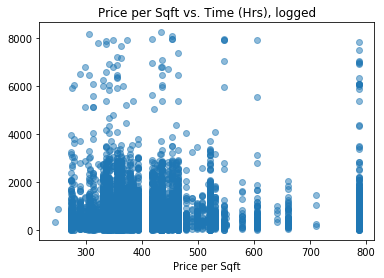

In [22]:
plt.scatter(non_zero_df['Neighborhood Prices'], non_zero_df['Duration to Close (Hrs)'], \
        alpha = 0.5)
#plt.ylim(0, 1000)
plt.xlabel('Price per Sqft')
plt.title('Price per Sqft vs. Time (Hrs), logged')
plt.show()

In [333]:
#logged pearson r
sp.pearsonr(np.log(non_zero_df['Neighborhood Prices']), np.log(non_zero_df['Duration to Close (Hrs)']))

(8.8260554967011282e-05, 0.99231720754669972)

In [20]:
#unlogged pearson r
sp.pearsonr(non_zero_df['Neighborhood Prices'], non_zero_df['Duration to Close (Hrs)'])

(0.016807668712271358, 0.066680376001256009)

In [27]:
sp.spearmanr(non_zero_df['Neighborhood Prices'], non_zero_df['Duration to Close (Hrs)'])

SpearmanrResult(correlation=0.0057672221366658833, pvalue=0.52921749142692764)

In [28]:
sp.spearmanr(np.log(non_zero_df['Neighborhood Prices']), np.log(non_zero_df['Duration to Close (Hrs)']))

SpearmanrResult(correlation=0.0057672221366658833, pvalue=0.52921749142692764)

In [273]:
sample = non_zero_df.sample(1200)
sample.mean()

In [275]:
avg_price = []
avg_time = []
for i in range(0,1000):
    sample = non_zero_df.sample(1200)
    time = sample['Neighborhood Prices'].mean()
    price = sample['Duration to Close (Hrs)'].mean()
    avg_price.append(price)
    avg_time.append(time)
    

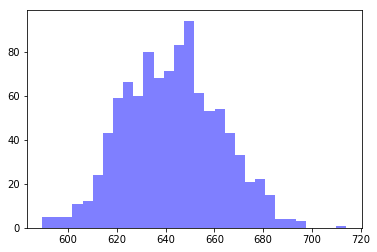

In [284]:
plt.hist(avg_price, 30, facecolor = 'blue', alpha = 0.5)
plt.show()

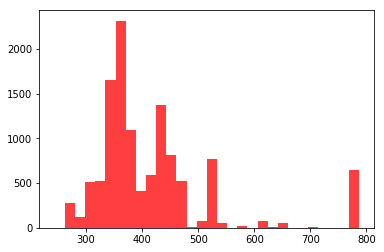

In [305]:
plt.hist(non_zero_df['Neighborhood Prices'], 30, facecolor = 'red', alpha = 0.5)
plt.show()

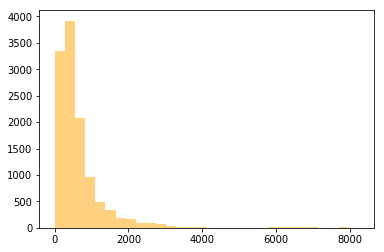

In [307]:
plt.hist(non_zero_df['Duration to Close (Hrs)'], 30, facecolor = 'orange', alpha = 0.5)
plt.show()

# pothole to meter analysis


In [104]:
meter_df = pd.read_csv('/Users/Timlee/Desktop/Pr_087/clean_data/TimLeeBro.csv')
meter_price_df = pd.read_csv('/Users/Timlee/Desktop/Pr_087/clean_data/merged_parking_meters.csv')

In [105]:
trans_dict = {}
for i in meter_price_df.index:
    if meter_price_df['pole_id'][i] not in trans_dict:
        trans_dict[meter_price_df['pole_id'][i]] = meter_price_df['combined_parking_meter_data'] [i]

{'CC-1003': 27724,
 'CC-1005': 31869,
 'CC-1011': 57232,
 'CC-1013': 37887,
 'CC-1015': 25950,
 'CC-1017': 30021,
 'CC-1019': 30962,
 'CC-1103': 47437,
 'CC-1105': 49463,
 'CC-1107': 45072,
 'CC-1109': 56784,
 'CC-1111': 59138,
 'CC-1115': 71846,
 'CC-1117': 74245,
 'MN-1827': 58543,
 'MN-1829': 56349,
 'MN-2808': 20113,
 'MN-2812': 22410,
 'MN-2814': 19298,
 'MN-2816': 20074,
 'MN-2824': 27280,
 'MN-2826': 15360,
 'MN-2828': 12275,
 'MN-2830': 11099,
 'MN-2838': 10228,
 'MN-2840': 5710,
 'MN-2842': 6435,
 'NL-1701': 47846,
 'NL-1703': 52964,
 'NL-1711': 36093,
 'NL-1713': 40996,
 'NL-1749': 51594,
 'NL-1751': 65054,
 'NL-2928': 8715,
 'KT-2700': 37930,
 'KT-2702': 20485,
 'KT-2704': 13419,
 'KT-2706': 7259,
 'KT-2708': 6765,
 'KT-2710': 7565,
 'KT-2810': 10224,
 'P-2908': 4450,
 'P-2910': 1380,
 'P-2912': 1850,
 'P-2914': 955,
 'P-2916': 1295,
 'P-2918': 1445,
 'P-2920': 1285,
 'P-2922': 1195,
 'P-2924': 2285,
 'P-2926': 1800,
 'WMB-826': 19440,
 'WMB-828': 12560,
 'WMB-838': 18645,
 

In [106]:
price_array = []
for i in meter_df.index:
    if meter_df['pole'][i] in trans_dict:
        income = trans_dict[meter_df['pole'][i]]
        price_array.append(income)
    else:
        price_array.append(0.0)
meter_df['Income'] = price_array

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


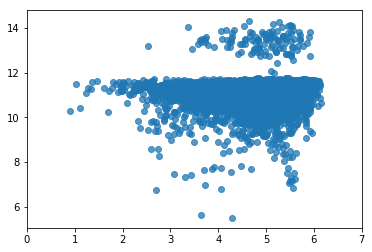

In [108]:
plt.scatter(np.log(meter_df['nearest_pothole_dist']), np.log(meter_df['Income']), alpha = 0.75)
plt.xlim(0,7)
plt.show()

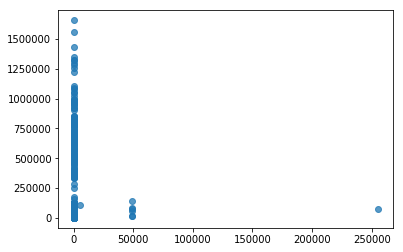

(-0.0023425995584659704, 0.87287301521457672)

In [109]:
plt.scatter(meter_df['nearest_pothole_dist'], meter_df['Income'], alpha = 0.75)
plt.show()
sp.pearsonr(meter_df['nearest_pothole_dist'], meter_df['Income'])


In [110]:
meter_df.corr()

,Unnamed: 0,config_id,longitude,latitude,nearest_pothole_dist,Income
Unnamed: 0,1.000000,0.200701,0.009388,0.404906,-0.018607,0.013916
config_id,0.200701,1.000000,-0.010246,-0.008135,0.004676,0.181100
longitude,0.009388,-0.010246,1.000000,0.002328,-0.901731,-0.000689
latitude,0.404906,-0.008135,0.002328,1.000000,-0.356686,-0.057031
nearest_pothole_dist,-0.018607,0.004676,-0.901731,-0.356686,1.000000,-0.002343
Income,0.013916,0.181100,-0.000689,-0.057031,-0.002343,1.000000


In [111]:
meter_df['Income'] = np.log(meter_df['Income'])
meter_df['nearest_pothole_dist'] = np.log(meter_df['nearest_pothole_dist'])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [112]:
meter_df = meter_df.drop(meter_df.loc[meter_df['Income'] > 12].index)

In [113]:
meter_df

,Unnamed: 0,zone,area,sub_area,pole,config_id,config_name,longitude,latitude,nearest_pothole_dist,Income
0,0,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1003,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145178,32.700353,5.912003,10.230054
1,1,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1005,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145178,32.700352,5.911780,10.369389
2,2,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1011,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145349,32.700155,5.836012,10.954868
3,3,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1013,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145405,32.700107,5.813961,10.542363
4,4,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1015,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145539,32.699987,5.757803,10.163927
5,5,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1017,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145540,32.699985,5.757085,10.309652
6,6,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1019,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145545,32.699981,5.755050,10.340516
7,7,City,Barrio Logan,1100 CESAR CHAVEZ WAY,CC-1103,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145973,32.699544,5.533230,10.767158
8,8,City,Barrio Logan,1100 CESAR CHAVEZ WAY,CC-1105,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145973,32.699545,5.533552,10.808980
9,9,City,Barrio Logan,1100 CESAR CHAVEZ WAY,CC-1107,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.146065,32.699490,5.491907,10.716016


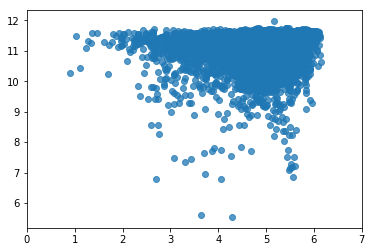

In [115]:
plt.scatter(meter_df['nearest_pothole_dist'], meter_df['Income'], alpha = 0.75)
plt.xlim(0,7)
plt.show()

In [116]:
meter_df.to_csv('poor_meters.csv')

In [117]:
#looked at scatter plots/ pearson r
#looked at log scatter plots/ pearson r
#noticed break
#looked at upper break
#realized we should plot on ArcGis
#difficult to find correlation due to the density of meters in specific areas


In [492]:
closed_df = pd.read_csv('closed_with_times.csv')

In [126]:
del closed_df['Unnamed: 0.1.1']

In [128]:
del closed_df['Unnamed: 0']

In [130]:
del closed_df['Unnamed: 0.1']


In [132]:
closed_df.to_csv('help.csv')

In [5]:
closed_df = pd.read_csv('/Users/Timlee/Desktop/Pr_087/clean_data/no_duplicates.csv')

In [6]:
closed_df = closed_df.sort_values('Duration to Close (Hrs)')

In [7]:
ph_counts = closed_df['Neighborhood'].value_counts()
ph_counts = ph_counts[ph_counts < 10]
city_list = ph_counts.index
for city in city_list:
    closed_df = closed_df.drop(closed_df.loc[closed_df['Neighborhood'] == city].index)

In [8]:
closed_df = closed_df.sort_values('closed_date')
closed_df = closed_df.reset_index()

In [9]:
import matplotlib.dates as dates
date_array = []
for i in closed_df.index:
    plottable = closed_df['closed_date'][i]
    plottable = dates.datestr2num(plottable)
    date_array.append(plottable)

closed_df['closed_changed_date'] = date_array

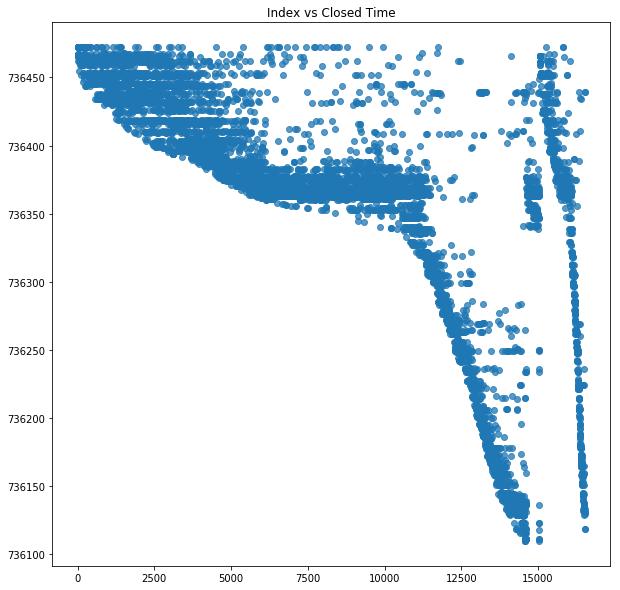

In [10]:
plt.scatter(closed_df['index'], closed_df['closed_changed_date'], alpha = 0.75)
plt.title('Index vs Closed Time')
plt.show()
#167 was the only one done that day
#show date of 166, 167, and 168

In [11]:
neighb_dict = {}
neighb_num = 1
for i in closed_df.index:
    neighb = closed_df['Neighborhood'][i]
    if neighb not in neighb_dict:
        neighb_dict[neighb] = neighb_num
        neighb_num +=1

In [12]:
neighb_num_array = []
for i in closed_df.index:
    neighb = closed_df['Neighborhood'][i]
    neigh_val = neighb_dict[neighb]
    neighb_num_array.append(neigh_val)
closed_df['Neighborhood_Val'] = neighb_num_array

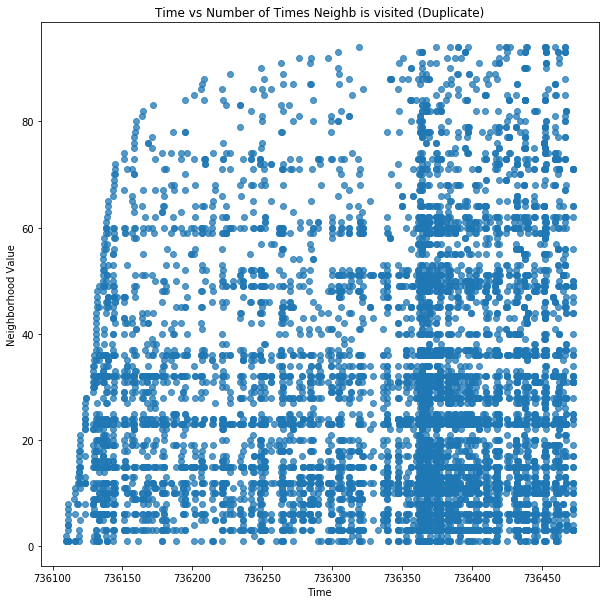

In [13]:
plt.scatter(closed_df['closed_changed_date'], closed_df['Neighborhood_Val'], alpha = 0.75)
# plt.xlim(closed_df['closed_changed_date'][0], closed_df['closed_changed_date'][100])
plt.xlabel('Time')
plt.ylabel('Neighborhood Value')
plt.title('Time vs Number of Times Neighb is visited (Duplicate)')
plt.show()
plt.close()

In [14]:
total_neighb = {}
for i in closed_df.index:
    neigh_array = []
    neighborhood = closed_df['Neighborhood'][i]
    if neighborhood not in total_neighb:
        neigh_array.append(closed_df['Duration to Close (Hrs)'][i])
        total_neighb[neighborhood] = neigh_array
    else:
        temp_array = total_neighb[neighborhood]
        temp_array.append(closed_df['Duration to Close (Hrs)'][i])
        total_neighb[neighborhood] = temp_array

In [15]:
neigh_array.append(closed_df['Duration to Close (Hrs)'][1])

In [16]:
for key in total_neighb:
    val_list = total_neighb[key]
    median = np.median(val_list)
    total_neighb[key] = median

In [17]:
median_time = []
for i in closed_df.index:
    val = total_neighb[closed_df['Neighborhood'][i]]
    median_time.append(val)
closed_df['Median_Time_Closed'] = median_time

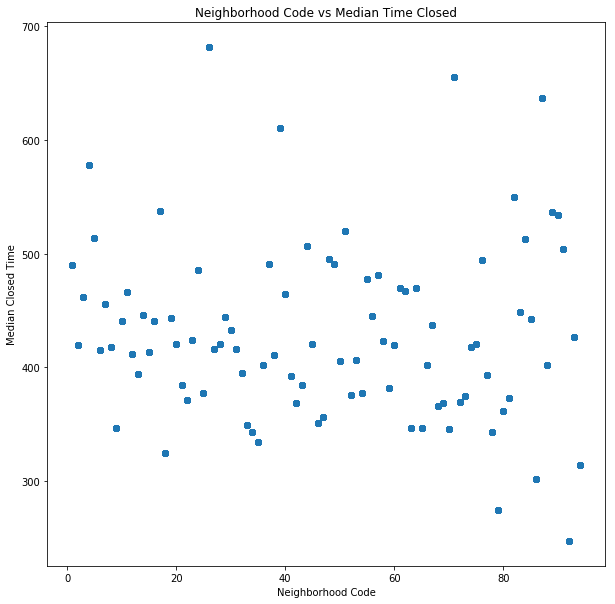

In [18]:
plt.scatter(closed_df['Neighborhood_Val'], closed_df['Median_Time_Closed'], alpha = 0.75)
plt.xlabel('Neighborhood Code')
plt.ylabel('Median Closed Time')
plt.title('Neighborhood Code vs Median Time Closed')
plt.show()

In [19]:
ph_counts2 = closed_df['Neighborhood'].value_counts()
ph_counts2 = ph_counts2.to_dict()
closed_df = closed_df.dropna(subset = ['Neighborhood'])

In [20]:
ph_count_dict = {}
for i in closed_df.index:
    temp = closed_df['Neighborhood'][i]
    if temp not in ph_count_dict:
        val = ph_counts2[temp]
        ph_count_dict[temp] = val

ph_count_array = []
for i in closed_df.index:
    temp = closed_df['Neighborhood'][i]
    count = ph_count_dict[temp]
    ph_count_array.append(count)

closed_df['City Pothole Count'] = ph_count_array

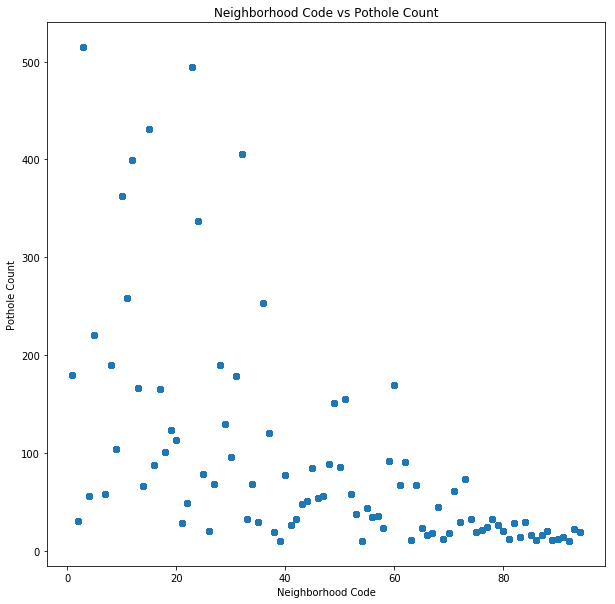

In [21]:
plt.scatter(closed_df['Neighborhood_Val'], closed_df['City Pothole Count'], alpha = 0.75)
plt.xlabel('Neighborhood Code')
plt.ylabel('Pothole Count')
plt.title('Neighborhood Code vs Pothole Count')
plt.show()

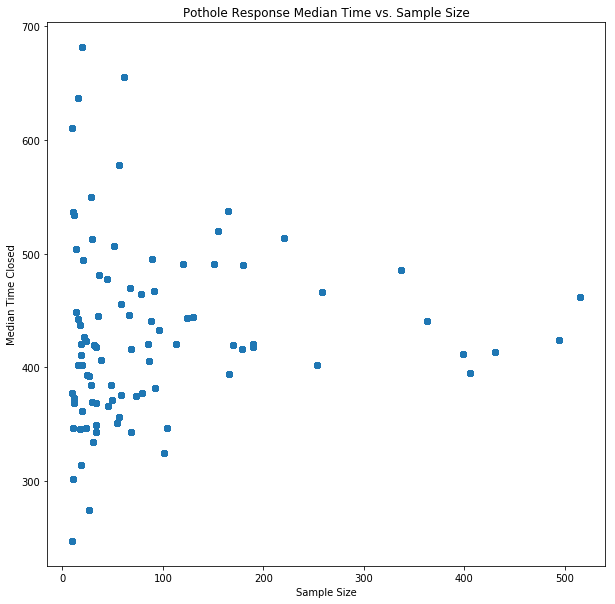

In [22]:
plt.title('Pothole Response Median Time vs. Sample Size')
plt.scatter(closed_df['City Pothole Count'],closed_df['Median_Time_Closed'], alpha = 0.75)
plt.ylabel('Median Time Closed')
plt.xlabel('Sample Size')
plt.show()

In [23]:
open_df = pd.read_csv('/Users/Timlee/Desktop/Pr_087/clean_data/final_fixed_open_count_pop.csv', header = None)
del open_df[1]

In [24]:
open_df.columns = ['Neighborhood', 'Population', 'Density']
del open_df['Density']
open_df = open_df.dropna()

In [32]:
pop_dict = {}
for i in open_df.index:
    if open_df['Neighborhood'][i] not in pop_dict:
        pop_dict[open_df['Neighborhood'][i]] = open_df['Population'][i]

population_Val = []
for i in closed_df.index:
    neighb = closed_df['Neighborhood'][i]
    if neighb not in pop_dict:
        pop = 0
    else:
        pop = pop_dict[neighb]
    population_Val.append(pop)
closed_df['Population'] = population_Val

KeyError: 'Neighborhood'

In [33]:
for i in closed_df.index:
    closed_df.ix[i, 'Population'] = str(closed_df['Population'][i]).replace(',', '')

closed_df['Population'] = pd.to_numeric(closed_df['Population'])

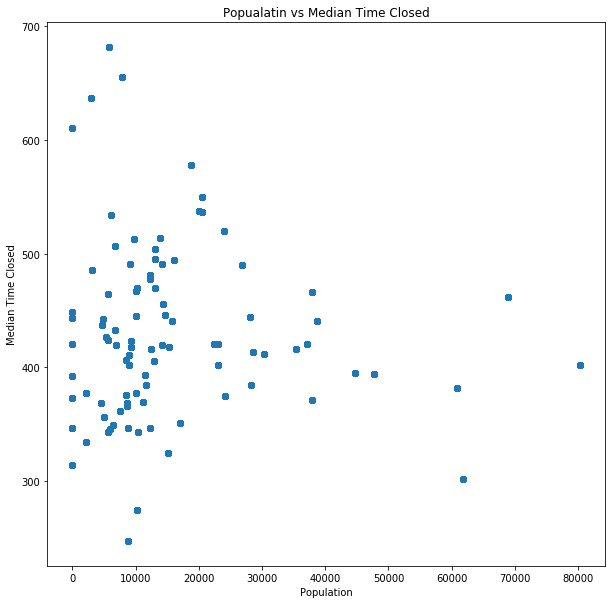

(-0.086744841899786693, 7.8187681799451874e-16)

In [34]:
plt.scatter(closed_df['Population'], closed_df['Median_Time_Closed'], alpha = 0.75)
plt.xlabel('Population')
plt.ylabel('Median Time Closed')
plt.title('Popualatin vs Median Time Closed')
plt.show()
sp.pearsonr(closed_df['Population'], closed_df['Median_Time_Closed'])

# working with open date

In [35]:
open_df = pd.read_csv('/Users/Timlee/Desktop/Pr_087/clean_data/final_fixed_open_count_pop.csv', header = None)

In [36]:
#median number of hours a city is visited
neighb_list2 = []
for i in closed_df.index:
    if closed_df['Neighborhood'][i] not in neighb_list2:
        neighb_list2.append(closed_df['Neighborhood'][i])
        
median_time_dict={}

for neighb in neighb_list2:
    neighb_df = closed_df.loc[closed_df['Neighborhood'] == neighb]

    time_list = []
    for i in range(0,len(neighb_df)-1):
        neighb_df = neighb_df.reset_index(drop = True)
        a = datetime.strptime(str(neighb_df['closed_date'][i]), date_format)
        b = datetime.strptime(str(neighb_df['closed_date'][i + 1]), date_format)
        delta = b-a
        hours_seconds = delta.seconds/3600
        hours_days = delta.days * 24
        time_list.append(hours_days + hours_seconds)

    while (0.0) in time_list:
        time_list.remove(0.0)
    med = np.median(time_list)
    
    if neighb not in median_time_dict:
        median_time_dict[neighb] = med

median_time_dict

{'Allied Gardens': 72.0,
 'Balboa Park': 72.266666666666666,
 'Bankers Hill': 144.0,
 'Barrio Logan': 72.016666666666666,
 'Bay Ho': 72.0,
 'Bay Park': 24.016666666666666,
 'Bay Terraces': 73.049999999999997,
 'Birdland': 120.33333333333334,
 'Black Mountain Ranch': 624.0,
 'Carmel Mountain Ranch': 47.983333333333334,
 'Carmel Valley': 72.0,
 'Chollas Creek': 402.24166666666667,
 'Chollas View': 288.01666666666665,
 'City Heights': 252.00833333333333,
 'Clairemont': 24.016666666666666,
 'Clairemont Mesa East': 47.983333333333334,
 'Clairemont Mesa West': 47.983333333333334,
 'College East': 192.0,
 'College West': 312.03333333333336,
 'Core-Columbia': 167.98333333333335,
 'Del Cerro': 83.991666666666674,
 'Del Mar Heights': 156.0,
 'Downtown': 45.950000000000003,
 'East Village': 324.00833333333333,
 'Egger Highlands': 240.00833333333333,
 'El Cerrito': 203.99166666666667,
 'Emerald Hills': 216.0,
 'Encanto': 63.583333333333336,
 'Golden Hill': 119.96666666666667,
 'Grant Hill': 311.98

In [37]:
#median number of hours a pot hole is reported
neighb_list2 = []
for i in closed_df.index:
    if closed_df['Neighborhood'][i] not in neighb_list2:
        neighb_list2.append(closed_df['Neighborhood'][i])
        
median_time_open_dict={}

for neighb in neighb_list2:
    neighb_df = closed_df.loc[closed_df['Neighborhood'] == neighb]

    time_list = []
    for i in range(0,len(neighb_df)-1):
        neighb_df = neighb_df.reset_index(drop = True)
        a = datetime.strptime(str(neighb_df['requested_datetime'][i]), date_format)
        b = datetime.strptime(str(neighb_df['requested_datetime'][i + 1]), date_format)
        delta = b-a
        hours_seconds = delta.seconds/3600
        hours_days = delta.days * 24
        time_list.append(hours_days + hours_seconds)

    while (0.0) in time_list:
        time_list.remove(0.0)
    med = np.median(time_list)
    
    if neighb not in median_time_open_dict:
        median_time_open_dict[neighb] = med

median_time_open_dict

{'Allied Gardens': 42.266666666666666,
 'Balboa Park': 76.299999999999997,
 'Bankers Hill': 120.51666666666667,
 'Barrio Logan': 38.608333333333334,
 'Bay Ho': -0.016666666666665719,
 'Bay Park': 15.666666666666668,
 'Bay Terraces': 28.366666666666667,
 'Birdland': 0.033333333333333333,
 'Black Mountain Ranch': 761.05833333333339,
 'Carmel Mountain Ranch': 20.233333333333334,
 'Carmel Valley': 68.200000000000003,
 'Chollas Creek': 75.549999999999997,
 'Chollas View': 130.05000000000001,
 'City Heights': 137.09166666666667,
 'Clairemont': 19.899999999999999,
 'Clairemont Mesa East': 3.1416666666666666,
 'Clairemont Mesa West': 54.56666666666667,
 'College East': 49.549999999999997,
 'College West': 26.674999999999997,
 'Core-Columbia': 104.99166666666667,
 'Del Cerro': 70.416666666666671,
 'Del Mar Heights': 52.483333333333334,
 'Downtown': 19.416666666666668,
 'East Village': 95.983333333333334,
 'Egger Highlands': 106.19166666666666,
 'El Cerrito': 79.266666666666666,
 'Emerald Hills'

In [70]:
#average # of potholes fixed in 20 hour span
neighb_list2 = []
for i in closed_df.index:
    if closed_df['Neighborhood'][i] not in neighb_list2:
        neighb_list2.append(closed_df['Neighborhood'][i])
        

num_of_ph_dict = {}
        
for neighb in neighb_list2:
    neighb_df = closed_df.loc[closed_df['Neighborhood'] == neighb]

    time_list = []
    for i in range(0,len(neighb_df)-1):
        neighb_df = neighb_df.reset_index(drop = True)
        a = datetime.strptime(str(neighb_df['closed_date'][i]), date_format)
        b = datetime.strptime(str(neighb_df['closed_date'][i + 1]), date_format)
        delta = b-a
        hours_seconds = delta.seconds/3600
        hours_days = delta.days * 24
        time_list.append(hours_days + hours_seconds)

    num_of_ph = 0
    list_num_ph = []
    
    cap = median_time_dict[neighb]
    for val in time_list:
        if val < cap:
            num_of_ph +=1
        else: 
            list_num_ph.append(num_of_ph)
            num_of_ph = 0
    med = np.mean(list_num_ph)
    if neighb not in num_of_ph_dict:
        num_of_ph_dict[neighb] = med
num_of_ph_dict    

{'Allied Gardens': 1.7105263157894737,
 'Balboa Park': 1.6875,
 'Bankers Hill': 1.3157894736842106,
 'Barrio Logan': 2.2142857142857144,
 'Bay Ho': 2.6888888888888891,
 'Bay Park': 3.8648648648648649,
 'Bay Terraces': 2.0769230769230771,
 'Birdland': 2.0,
 'Black Mountain Ranch': 1.0,
 'Carmel Mountain Ranch': 2.6346153846153846,
 'Carmel Valley': 1.6774193548387097,
 'Chollas Creek': 0.5,
 'Chollas View': 0.80000000000000004,
 'City Heights': 0.59999999999999998,
 'Clairemont': 2.6714285714285713,
 'Clairemont Mesa East': 2.5714285714285716,
 'Clairemont Mesa West': 1.75,
 'College East': 1.625,
 'College West': 2.125,
 'Core-Columbia': 1.7647058823529411,
 'Del Cerro': 1.75,
 'Del Mar Heights': 1.3333333333333333,
 'Downtown': 2.375,
 'East Village': 1.0,
 'Egger Highlands': 1.6000000000000001,
 'El Cerrito': 1.6000000000000001,
 'Emerald Hills': 1.0833333333333333,
 'Encanto': 1.6756756756756757,
 'Golden Hill': 1.5769230769230769,
 'Grant Hill': 1.125,
 'Grantville': 1.75,
 'Hillcr

In [40]:
#   current pothole + rate at which its added - (time each region is visited, * avg pothole fixed per visit)

In [45]:
curr_size_dict={}
for i in open_df.index:
    neighb = open_df[0][i]
    if neighb not in curr_size_dict:
        curr_size_dict[neighb] = open_df[1][i]

In [78]:
def find_time(avg_fixed, time_visit, time_report, curr_size):
    ph_per_hour = avg_fixed / time_visit
    curr_time_to_fix = curr_size * ph_per_hour
    ph_reported_per_hour = 1/time_report
    x = symp.Symbol('x')
    return symp.solve(curr_time_to_fix + ph_reported_per_hour*x - (ph_per_hour)*x, x)
    

In [79]:
funct_vals = []
for neighb in neighb_list2:
    avg_fixed = num_of_ph_dict[neighb]
    med_region_visit = median_time_dict[neighb]
    med_rate_report = median_time_open_dict[neighb]
    if neighb not in curr_size_dict:
        curr_ph = 0
    else:
        curr_ph = curr_size_dict[neighb]
    x = find_time(avg_fixed,med_region_visit,med_rate_report,curr_ph)
    funct_vals.append(x)

In [80]:
funct_vals

[[-18.4226133651551],
 [-8.94833376388533],
 [-0.534068253782103],
 [-19.3030303030303],
 [-26.9366574556113],
 [67.5769230769232],
 [180.236243226972],
 [8969.23529411796],
 [86.1847280618473],
 [167.812365204889],
 [-0.552033400340188],
 [107.977314014799],
 [-24.0932816972554],
 [248.448933174483],
 [110.622641509434],
 [-3.27635937245907],
 [29.3681885425008],
 [118.044667875392],
 [-5.11021580267020],
 [160.683312549597],
 [-17.9700394218135],
 [-111.408219178082],
 [39.1119673873879],
 [-4.18284020013589],
 [-1.01838891739354],
 [18772.7215189873],
 [-41.4263088429390],
 [74.1611545399880],
 [0.0304799995887316],
 [92.4503518863932],
 [134.890463917526],
 [-8.76611050054950],
 [46.0592633619496],
 [204.448091677187],
 [70.2444444444445],
 [-24.7659084939854],
 [-0.312084454144039],
 [50.2495486885420],
 [0.0],
 [-1597.20956719814],
 [-8.55802495020442],
 [84.3806713003389],
 [-29.1771428571429],
 [-155.646398503274],
 [-0.00443458980044347],
 [68.3399403613400],
 [42.853716407902

In [73]:
neighb_list2

['Clairemont Mesa East',
 'Del Mar Heights',
 'Mira Mesa',
 'MIddletown',
 'Hillcrest',
 'North Clairemont',
 'Carmel Mountain Ranch',
 'Allied Gardens',
 'Bay Park',
 'Clairemont',
 'Pacific Beach',
 'University City',
 'Sabre Springs',
 'La Jolla',
 'Carmel Valley',
 'Tierrasanta',
 'Encanto',
 'Scripps Ranch',
 'Skyline',
 'Core-Columbia',
 'Point Loma',
 'Kearny Mesa',
 'Miramar',
 'Kensington',
 'Otay Mesa West',
 'Downtown',
 'Serra Mesa',
 'Mission Valley East',
 'Bay Ho',
 'Rancho Bernardo',
 'Valencia Park',
 'Golden Hill',
 'San Pasqual Valley',
 'North Park',
 'Sorrento Valley',
 'Miramar Ranch North',
 'Ocean View Hills',
 'Del Cerro',
 'Emerald Hills',
 'South Park',
 'San Ysidro',
 'Mission Valley',
 'Bay Terraces',
 'Logan Heights',
 'Birdland',
 'Clairemont Mesa West',
 'Midway District',
 'University Heights',
 'Linda Vista',
 'Mission Hills',
 'Jamacha-Lomita',
 'Southcrest',
 'Balboa Park',
 'Egger Highlands',
 'North City',
 'Talmadge',
 'Mission Bay',
 'San Carlos'